# Plots for my PhD Thesis

All those plots come from my different researches. The intention is to have them coherently designed.

### Required packages

In [1]:
using PyPlot

## Plot for accuracy bound in the vicinity of Dicke states

Those plots come from an analytical formula so the data is generated on the fly.

The magnetic field is along $Y$ direction, $H=\gamma J_y$

In [2]:
# It is a function of 5 expectation values <Jx^2>, <Jz^2>, <Jx^4>, <Jz^4> and <JzJx^2Jz>, and θ.
function precision(x2,z2,x4,z4,zx2z,θ)
    variancex2 = x4 - x2^2
    variancez2 = z4 - z2^2
    ftheta = variancez2 / (variancex2 * tan(θ)^2) + tan(θ)^2
    (variancex2 * ftheta + x2 - 2 * z2 * (1 + x2) + 6 * zx2z) / (4 * (x2 - z2)^2)
end

function opttheta(x2,z2,x4,z4)
    variancex2 = x4 - x2^2
    variancez2 = z4 - z2^2
    atan((variancez2 / variancex2)^0.25)
end

precision2(x2,z2,x4,z4,n,θ) = precision(x2,z2,x4,z4,(n*(n+2)/8*z2-z4/2),θ)

optprecision(x2,z2,x4,z4,zx2z) = precision(x2,z2,x4,z4,zx2z,opttheta(x2,z2,x4,z4))

optprecision2(x2,z2,x4,z4,n) = optprecision(x2,z2,x4,z4,(n*(n+2)/8*z2-z4/2))

optprecision3(x2,z2,n) = optprecision2(x2, z2, n^2/4 * x2, 3 * z2^2, n)

optprecision3 (generic function with 1 method)

### Vectorize functions for computing the data

In [3]:
function precision(x2,z2,x4,z4,zx2z,θ::Array{Float64,1})
    outcome = Array(Float64, length(θ))
    for i in 1:length(θ)
        outcome[i] = precision(x2,z2,x4,z4,zx2z,θ[i])
    end
    outcome
end

optprecision3(x2::Array{Float64,1},z2::Array{Float64,1},n) = begin
    outcome = Array(Float64,length(x2),length(z2))
    for i in 1:length(x2)
        for j in 1:length(z2)
            outcome[i,j] = optprecision3(x2[i],z2[j],n)
        end
    end
    outcome
end

optprecision3 (generic function with 2 methods)

In [4]:
methods(precision2)

# 1 method for generic function "precision2":
precision2(x2, z2, x4, z4, n, θ) at In[2]:15

### Plot evolution

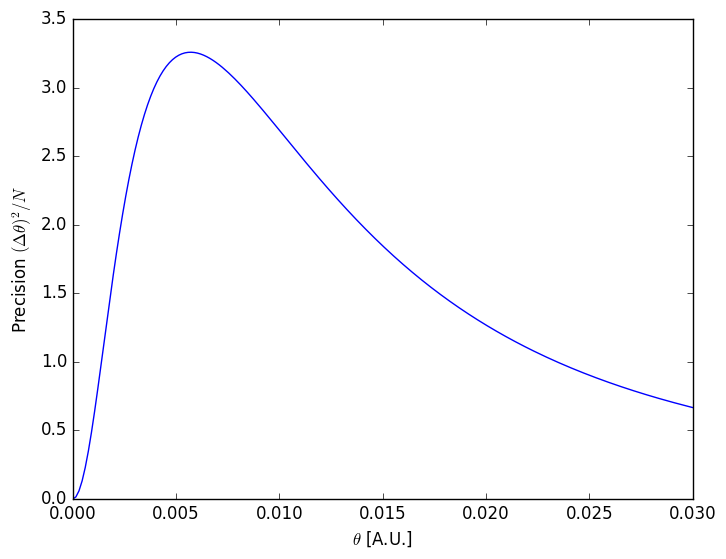

In [5]:
# Data

xmax=0.03
x = Array(linspace(0,xmax,200));
y = precision2(6e6, 112, 6.2e13, 4e4, 7900, x).^(-1)./7900;

# 
ylabel(L"Precision $(\Delta \theta)^2/N$")
xlabel(L"$\theta$ [A.U.]")

axis(xmin=0, xmax=xmax)

plot(x,y,linewidth=1)

savefig("svg/VD_precision_theta.svg")

### Plot versus qFI of known states

### Plot contour

In [118]:
n = 7900
points = 500
x = Array(linspace(0,n*(n+2)/8,points))/(n*(n+2)/8)
y = Array(linspace(0,400,points))
z = (optprecision3(x*n*(n+2)/8,y,7900).^(-1)/n)'
z[1:end,1] = zeros(1,points)
map!(x -> if x > 11 NaN else x end,z)

500x500 Array{Float64,2}:
 0.0  NaN            NaN           …  NaN        NaN        NaN      
 0.0    0.00320401     0.012668       NaN        NaN        NaN      
 0.0    0.00160216     0.00633622     NaN        NaN        NaN      
 0.0    0.00106807     0.0042245      NaN        NaN        NaN      
 0.0    0.000800998    0.00316842     NaN        NaN        NaN      
 0.0    0.000640746    0.00253471  …  NaN        NaN        NaN      
 0.0    0.000533908    0.00211221     NaN        NaN        NaN      
 0.0    0.000457593    0.0018104      NaN        NaN        NaN      
 0.0    0.000400355    0.00158405     NaN        NaN        NaN      
 0.0    0.000355837    0.00140798     NaN        NaN        NaN      
 0.0    0.000320222    0.00126713  …  NaN        NaN        NaN      
 0.0    0.000291082    0.00115189     NaN        NaN        NaN      
 0.0    0.000266799    0.00105585     NaN        NaN        NaN      
 ⋮                                 ⋱                            

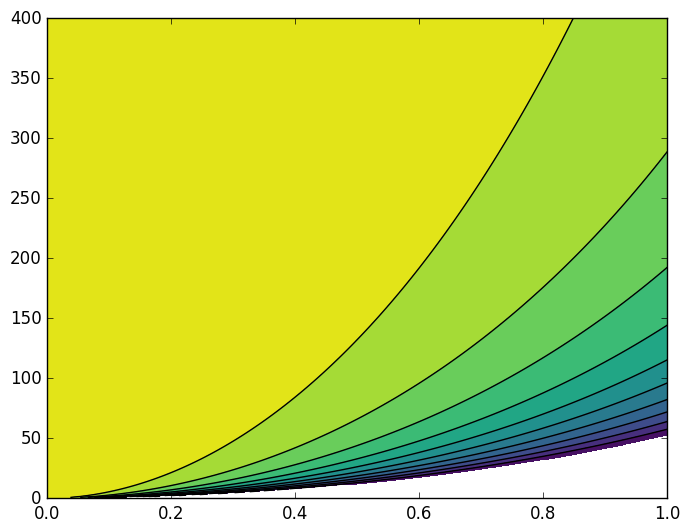

MethodError: MethodError: no method matching writemime(::Base.AbstractIOBuffer{Array{UInt8,1}}, ::MIME{symbol("image/svg+xml")}, ::PyCall.PyObject)
Closest candidates are:
  writemime(::IO, ::MIME{symbol("image/svg+xml")}, ::PyCall.PyObject)
  writemime(::IO, !Matched::AbstractString, ::Any)
  writemime(::IO, !Matched::MIME{symbol("text/csv")}, ::Any)
  ...

In [119]:
ylabel(L"\langle J")

contourf(x,y,z,10, cmap="viridis_r", hold="on")
contour(x,y,z,10,colors="k")
savefig("svg/VD_contour.svg")